# Dados Banco Central

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import linregress
import warnings

# Desativar avisos de expiração
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#C:\Users\fallg\anaconda3\Lib\site-packages\bcb
  #  http://api.bcb.gov.br/dados/serie/bcdata.sgs
    

In [3]:
# !pip install python-bcb
from bcb import sgs
# https://analisemacro.com.br/data-science/python/python-visualizando-dados-com-matplotlib-e-seaborn/

In [4]:
# 'C:\\Users\\fallg\\anaconda3\\Lib\\site-packages\\bcb\\sgs.py'
# c:\users\fallg\anaconda3\lib\site-packages\bcb\sgs.py

In [5]:
ipca = sgs.get({'IPCA' : 433}, start = "2010-01-01")
desemprego = sgs.get({'desemprego' : 24369})


In [ ]:
# Fusão - União entre desemprego e ipca
""" Desemprego só tem até dez/23, ipca já atualizou fev/24"""
df = desemprego.merge(ipca, on = 'Date', how = 'left')
# Tem mais dados na linha do tempo de IPCA do que desemprego, por isso fez-se left join, prioridade para Desemprego

In [15]:
# mudar para ipca como principal
df = ipca.merge(desemprego, on = 'Date', how = 'left')

In [16]:
ipca.head(2)

,IPCA
Date,
2010-01-01,0.75
2010-02-01,0.78


In [17]:
ipca.tail()

,IPCA
Date,
2023-10-01,0.24
2023-11-01,0.28
2023-12-01,0.56
2024-01-01,0.42
2024-02-01,0.83


In [18]:
desemprego.head(2)

,desemprego
Date,
2012-03-01,8.0
2012-04-01,7.8


In [19]:
df.head(2)

,IPCA,desemprego
Date,,
2010-01-01,0.75,NaN
2010-02-01,0.78,NaN


In [20]:
df.tail()

,IPCA,desemprego
Date,,
2023-10-01,0.24,7.6
2023-11-01,0.28,7.5
2023-12-01,0.56,7.4
2024-01-01,0.42,NaN
2024-02-01,0.83,NaN


In [21]:
desemprego.tail()

,desemprego
Date,
2023-08-01,7.8
2023-09-01,7.7
2023-10-01,7.6
2023-11-01,7.5
2023-12-01,7.4


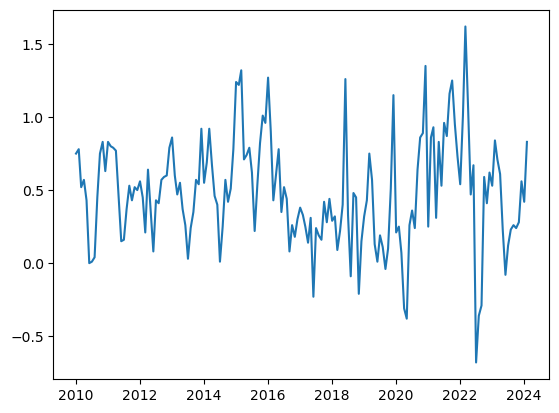

In [22]:
plt.plot(ipca)
plt.style.use('default')

In [23]:
df.head(3)

,IPCA,desemprego
Date,,
2010-01-01,0.75,NaN
2010-02-01,0.78,NaN
2010-03-01,0.52,NaN


In [24]:
df.reset_index(inplace=True)

In [25]:
df.head(2)

,Date,IPCA,desemprego
0,2010-01-01,0.75,NaN
1,2010-02-01,0.78,NaN


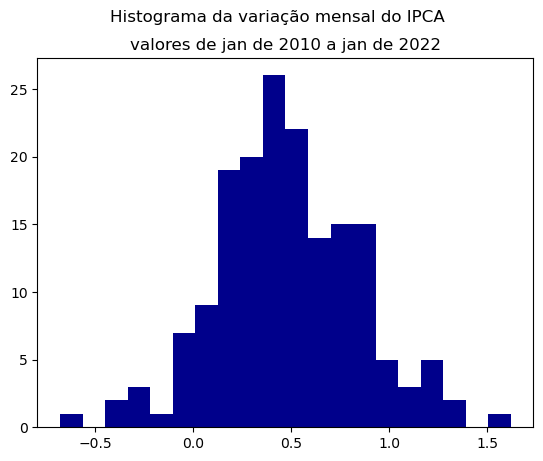

In [26]:
plt.hist(x = ipca['IPCA'],
         color = "darkblue",
         bins = 20)
plt.title("valores de jan de 2010 a jan de 2022")
plt.suptitle("Histograma da variação mensal do IPCA")
plt.style.use('ggplot')

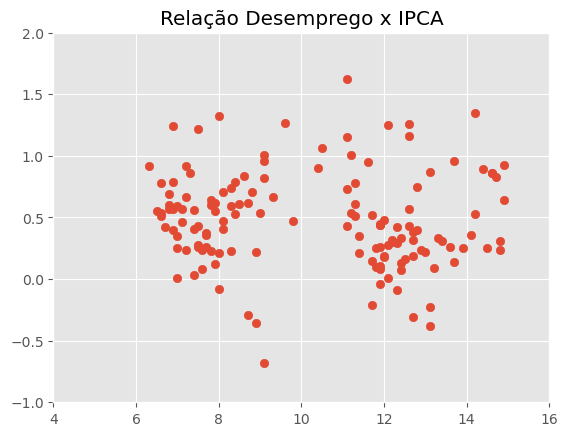

In [27]:
plt.scatter(x = df['desemprego'], y = df['IPCA'])
plt.title("Relação Desemprego x IPCA")
plt.style.use('classic')

<Axes: xlabel='Date'>

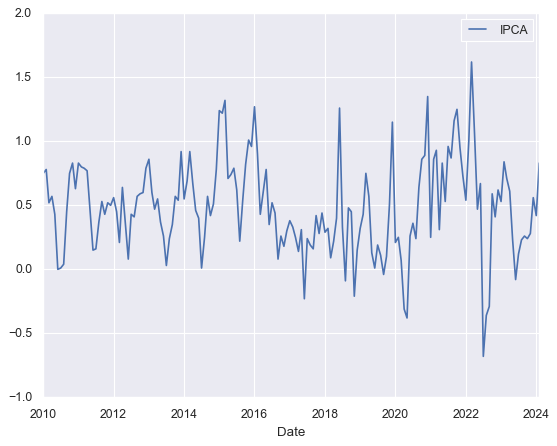

In [28]:
sns.set_theme()
sns.lineplot(data = ipca)

<Axes: >

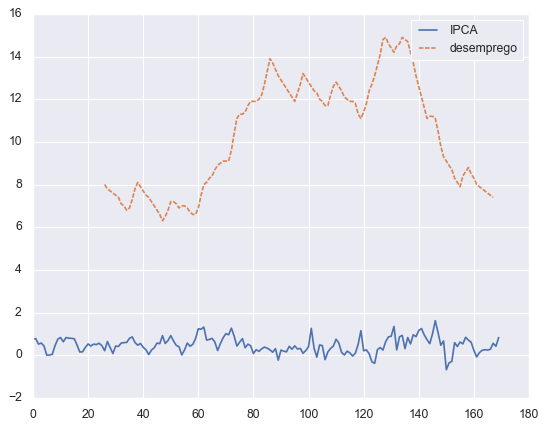

In [29]:
sns.set_theme()
sns.lineplot(data = df)

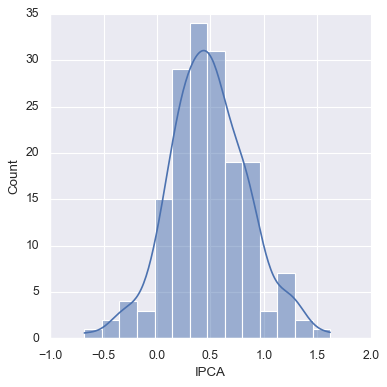

In [30]:
sns.displot(data = ipca, x = 'IPCA', kde = True)

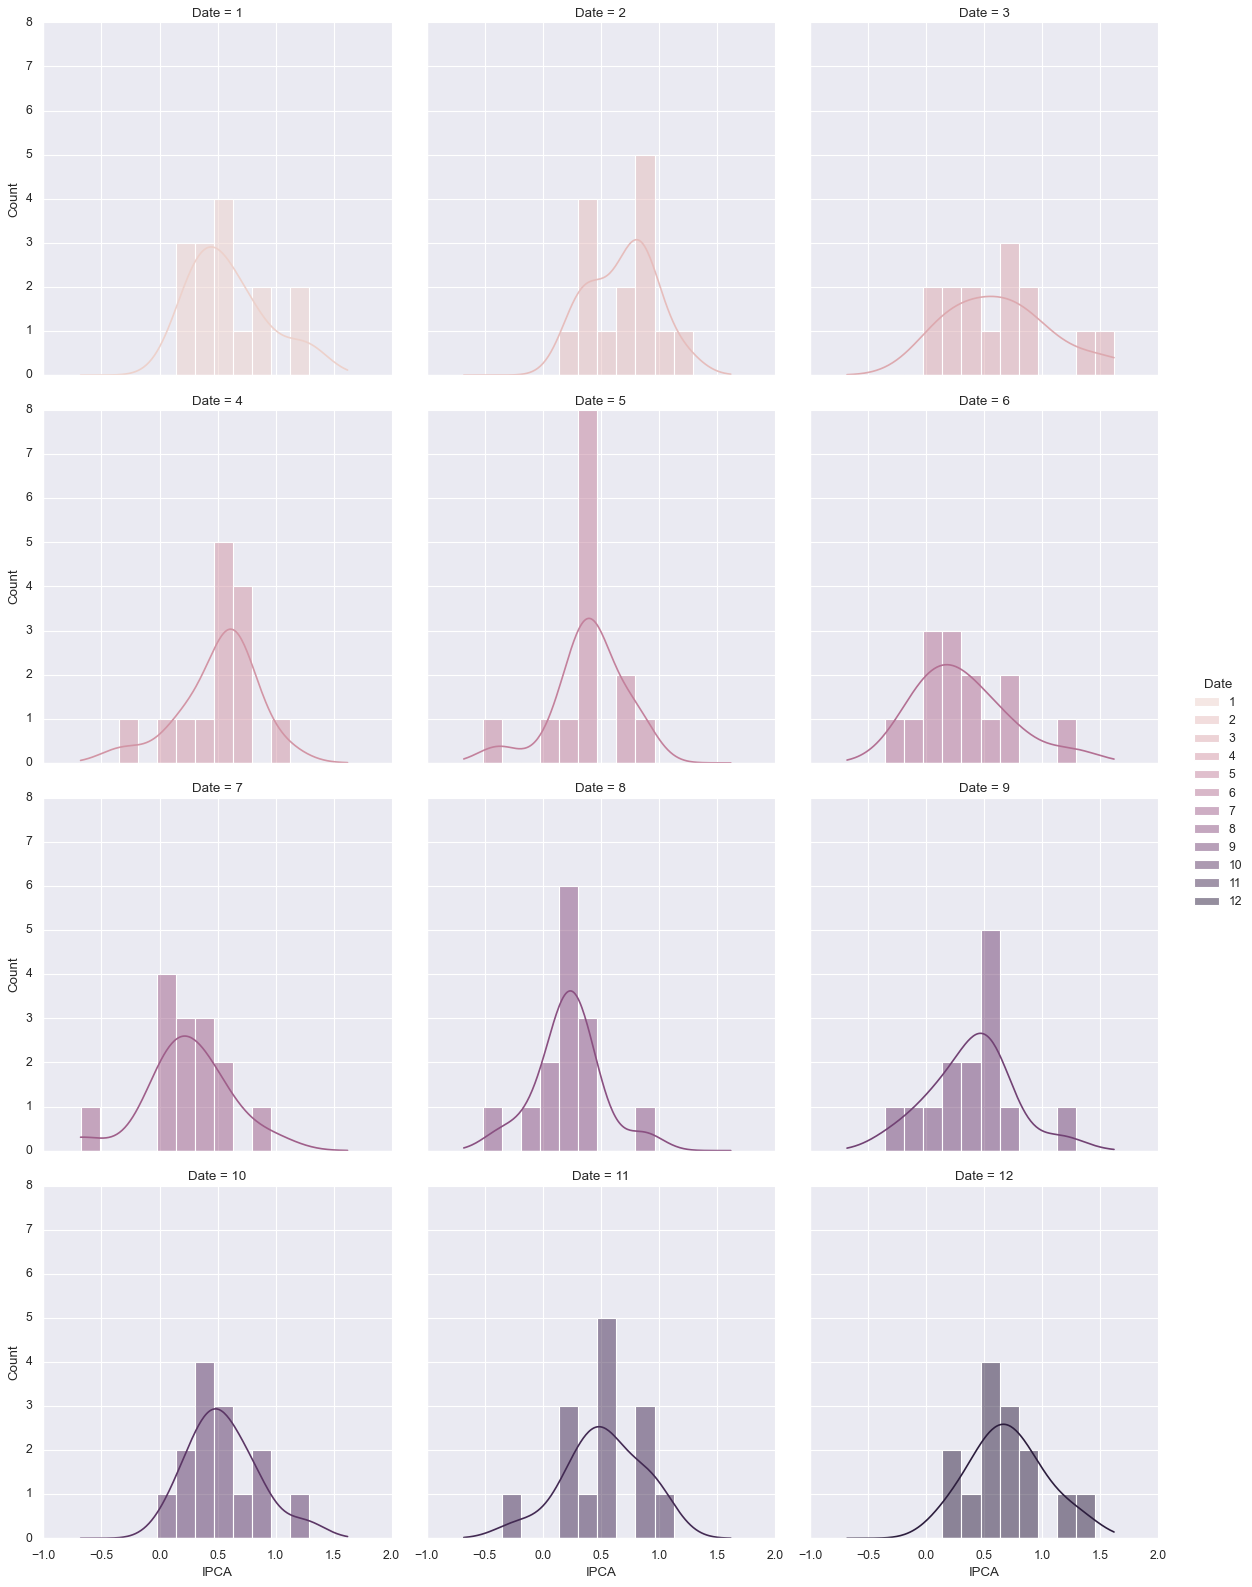

In [31]:
sns.displot(data = df, x = 'IPCA', kde = True, hue=df['Date'].dt.month, col=df['Date'].dt.month, col_wrap=3)

In [32]:
df['Date'].head(2)

0   2010-01-01
1   2010-02-01
Name: Date, dtype: datetime64[ns]

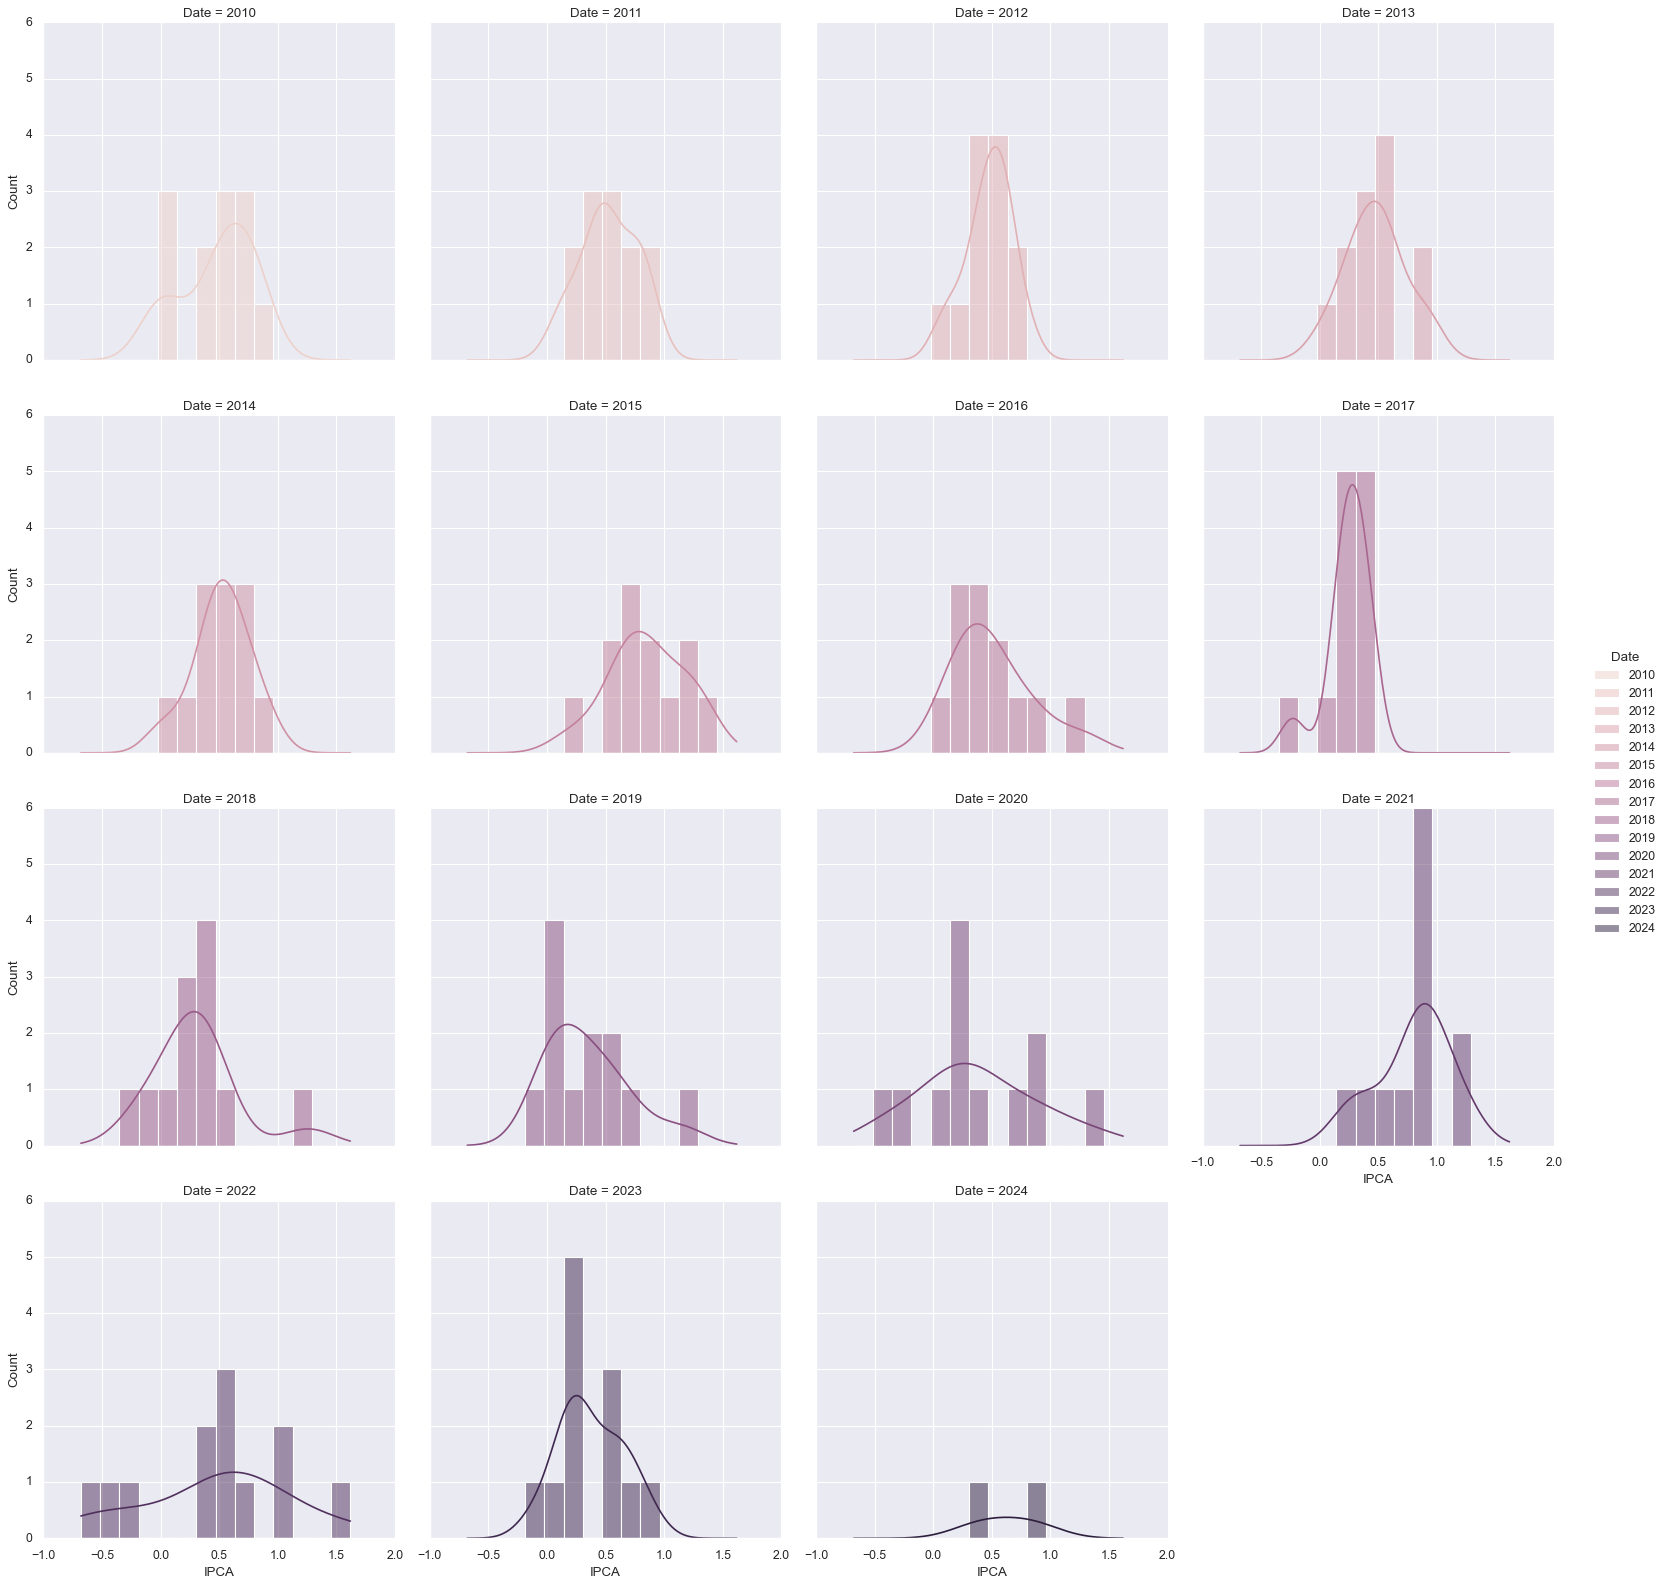

In [33]:
sns.displot(data = df, x = 'IPCA', kde = True, hue=df['Date'].dt.year, col=df['Date'].dt.year, col_wrap=4)

In [34]:
df

,Date,IPCA,desemprego
0,2010-01-01,0.75,NaN
1,2010-02-01,0.78,NaN
2,2010-03-01,0.52,NaN
3,2010-04-01,0.57,NaN
4,2010-05-01,0.43,NaN
...,...,...,...
165,2023-10-01,0.24,7.6
166,2023-11-01,0.28,7.5
167,2023-12-01,0.56,7.4
168,2024-01-01,0.42,NaN


<Axes: xlabel='desemprego', ylabel='IPCA'>

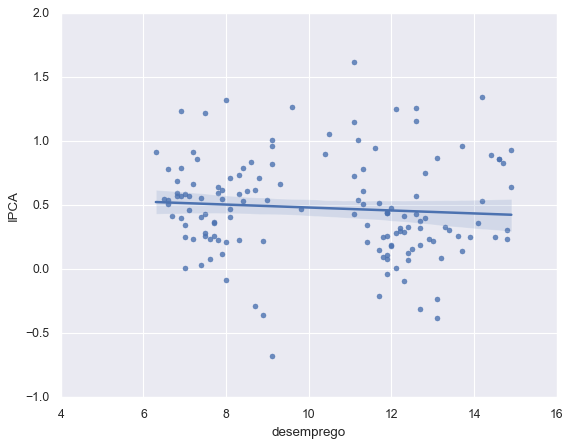

In [35]:
sns.regplot(data = df, x = 'desemprego', y = 'IPCA')

In [36]:
# Essa única linha insere 5 variáveis entre duas colunas
slope, intercept, r_value, p_value, std_err = linregress(df['desemprego'], df['IPCA'])
# Exibir os coeficientes da regressão linear
print(f"\nCoeficiente Angular: {round(slope, 2)}")
print(f"Intercepto: {round(intercept, 2)}")
print(f"Correlação: {round(r_value, 2)}")


Coeficiente Angular: nan
Intercepto: nan
Correlação: nan


In [37]:
assimetria = df['desemprego'].skew()
print('Desemprego ', assimetria)


Desemprego  0.05654488735663016


In [38]:
assimetria = df['IPCA'].skew()
print('IPCA ', assimetria)

IPCA  0.1029668741314793


In [39]:
curtose = df['desemprego'].kurtosis()
print('Desemprego ', curtose)

Desemprego  -1.4270888059054085


In [40]:
curtose = df['IPCA'].kurtosis()
print('IPCA ', curtose)

IPCA  0.5949347943584238


<Axes: >

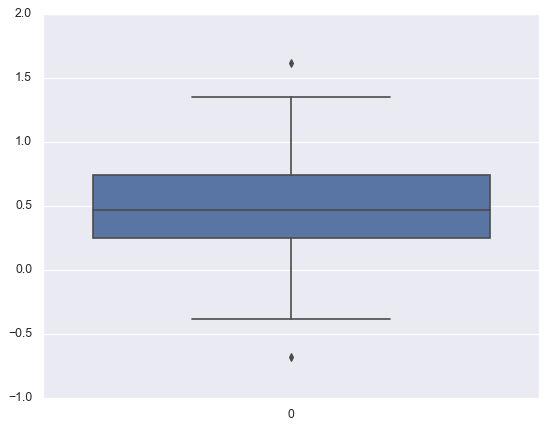

In [41]:
sns.boxplot(data=df['IPCA'])

<Axes: >

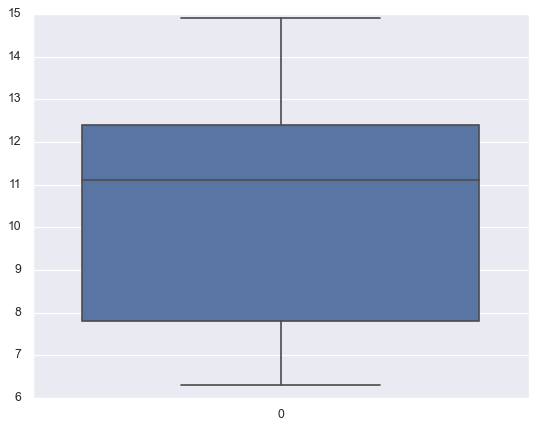

In [42]:
sns.boxplot(data=df['desemprego'])

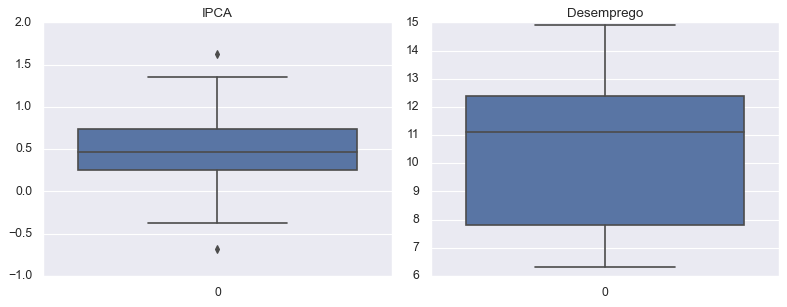

In [43]:
plt.figure(figsize=(10,4)) # largura x Altura
plt.subplot(1,2, 1)
sns.boxplot(data=df['IPCA'])
plt.title('IPCA')
plt.subplot(1,2, 2)
sns.boxplot(data=df['desemprego'])
plt.title('Desemprego')
plt.tight_layout()
plt.show()

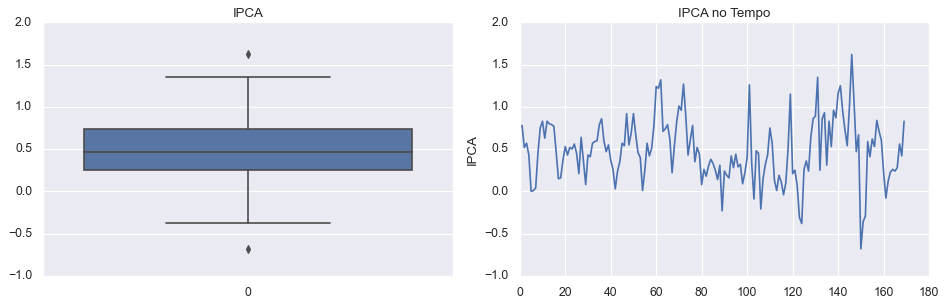

In [44]:
plt.figure(figsize=(12,4)) # largura x Altura
plt.subplot(1,2, 1)
sns.boxplot(data=df['IPCA'])
plt.title('IPCA')
plt.subplot(1,2, 2)
sns.lineplot(df['IPCA'])
plt.title('IPCA no Tempo')
plt.tight_layout()
plt.show()

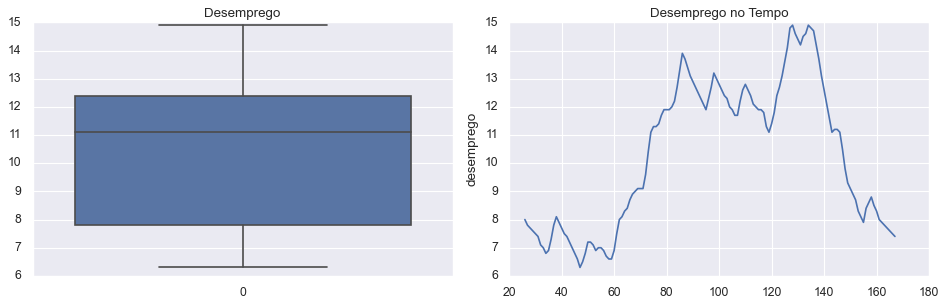

In [45]:
plt.figure(figsize=(12,4)) # largura x Altura
plt.subplot(1,2, 1)
sns.boxplot(data=df['desemprego'])
plt.title('Desemprego')
plt.subplot(1,2, 2)
sns.lineplot(df['desemprego'])
plt.title('Desemprego no Tempo')
plt.tight_layout()
plt.show()

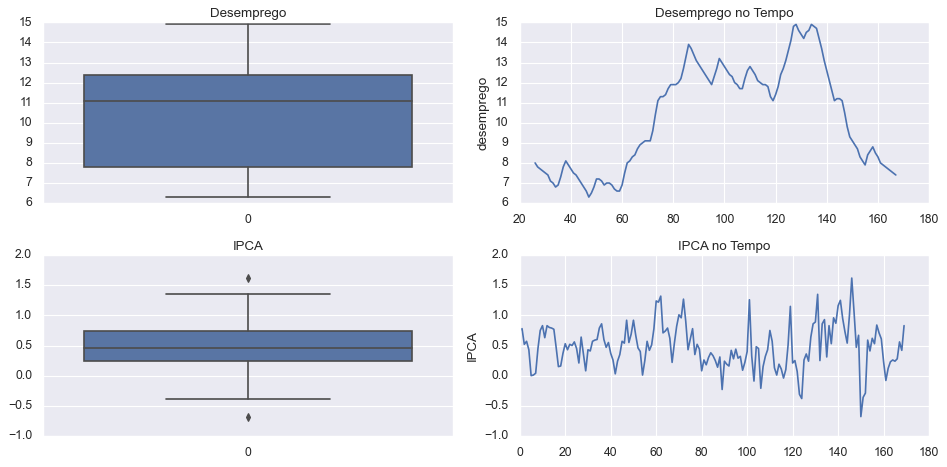

In [46]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(data=df['desemprego'])
plt.title('Desemprego')

plt.subplot(2, 2, 2)
sns.lineplot(df['desemprego'])
plt.title('Desemprego no Tempo')

plt.subplot(2, 2, 3)
sns.boxplot(data=df['IPCA'])
plt.title('IPCA')

plt.subplot(2, 2, 4)
sns.lineplot(df['IPCA'])
plt.title('IPCA no Tempo')

plt.tight_layout()
plt.show()

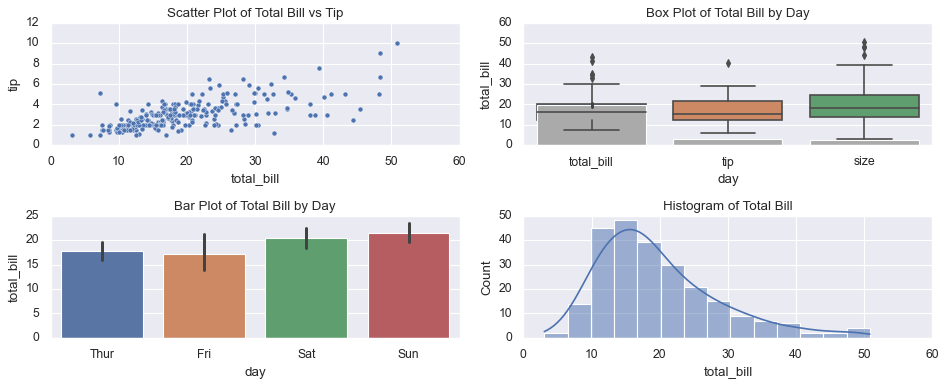

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset('tips')

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=data)
plt.title('Box Plot of Total Bill by Day')
# foi incluido aqui para teste, ficou no mesmo quadrante um outro gráfico
plt.subplot(2, 2, 2) # um gráfico abaixo do outro
sns.barplot(data=data, color='#AAA') 


plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=data)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(data['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'aspect=3')

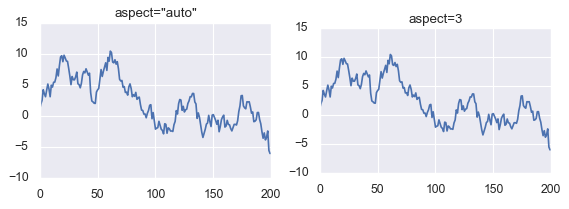

In [54]:
fig, g = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
# Gráfico esquerda
g[0].plot(t, x)
g[0].set_title('aspect="auto"')
# Gráfico direita
g[1].plot(t, x)
g[1].set_aspect(5)
g[1].set_title('aspect=3')

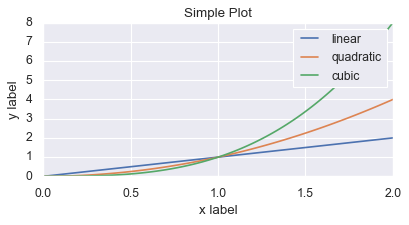

In [55]:
# cria os dados
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, g = plt.subplots(figsize=(5, 2.7), layout='constrained')
g.plot(x, x, label='linear')  # Plot some data on the axes.
g.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
g.plot(x, x**3, label='cubic')  # ... and some more.

g.set_xlabel('x label')  # Add an x-label to the axes.
g.set_ylabel('y label')  # Add a y-label to the axes.
g.set_title("Simple Plot")  # Add a title to the axes.
g.legend()  # Add a legend.

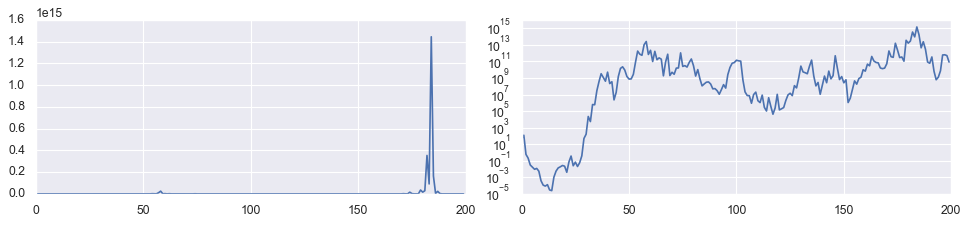

In [56]:
fig, g = plt.subplots(1, 2, figsize=(12, 2.7), layout='constrained')
data1= np.cumsum(np.random.randn(200))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1

g[0].plot(xdata, data)

g[1].set_yscale('log')
g[1].plot(xdata, data)

Text(0.5, 1.0, 'right')

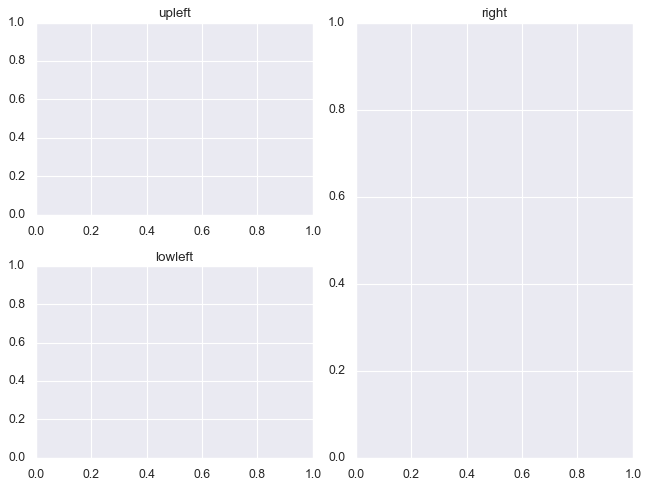

In [57]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')


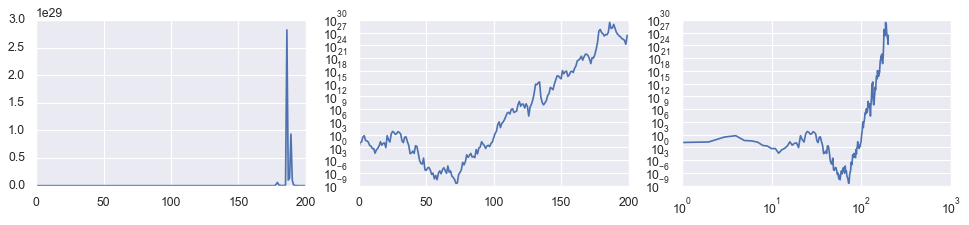

In [58]:
# Dados
data1= np.cumsum(np.random.randn(200))
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
# Gráfico
fig, g = plt.subplots(1, 3, figsize=(12, 2.7), layout='constrained')

g[0].plot(xdata, data)

g[1].set_yscale('log')
g[1].plot(xdata, data)

g[2].set_xscale('log')
g[2].set_yscale('log')
g[2].plot(xdata, data)

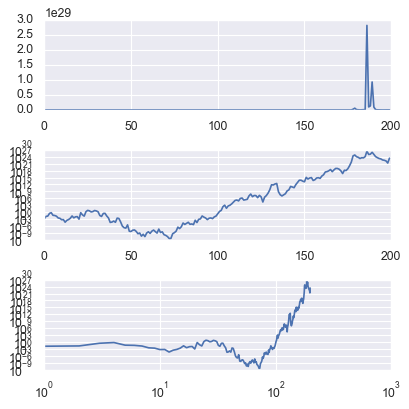

In [59]:
# Gráfico
fig, g = plt.subplots(3, 1, figsize=(5, 5), layout='constrained')

g[0].plot(xdata, data)

g[1].set_yscale('log')
g[1].plot(xdata, data)

g[2].set_xscale('log')
g[2].set_yscale('log')
g[2].plot(xdata, data)

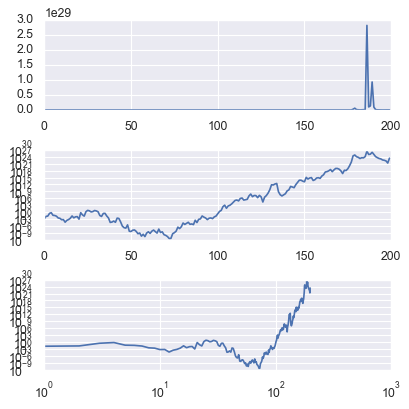

In [60]:
# Gráfico
fig, g = plt.subplots(3, 1, figsize=(5, 5), layout='constrained')

g[0].plot(xdata, data)

g[1].set_yscale('log')
g[1].plot(xdata, data)

g[2].set_xscale('log')
g[2].set_yscale('log')
g[2].plot(xdata, data)

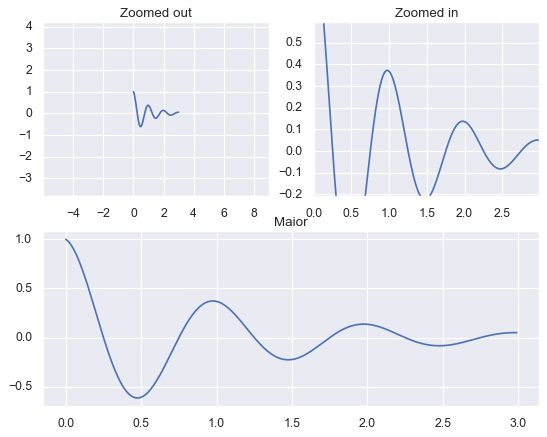

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Polygon


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))
ax1.set_title('Maior')

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

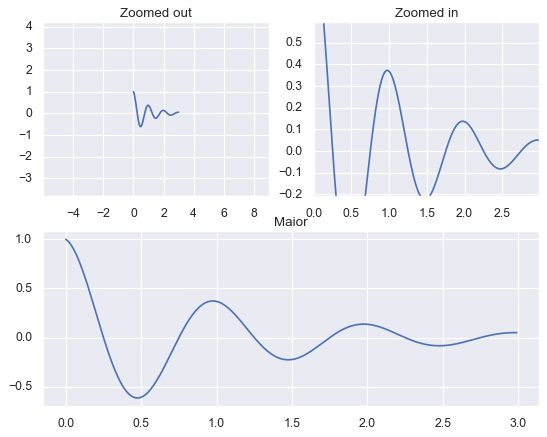

In [62]:
ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))
ax1.set_title('Maior')

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [63]:
x = [['A panel', 'A panel', 'edge'],
     ['C panel', '.',       'edge']]

In [64]:
x

[['A panel', 'A panel', 'edge'], ['C panel', '.', 'edge']]

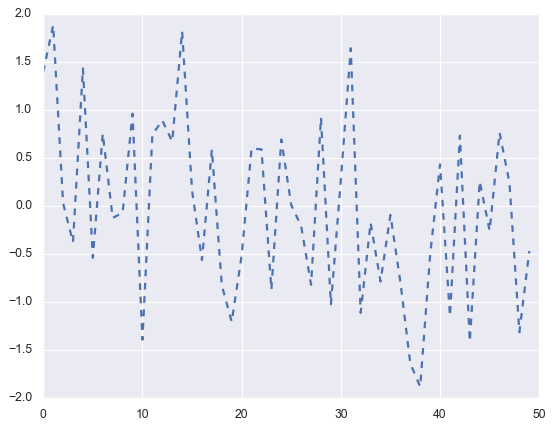

In [65]:
from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

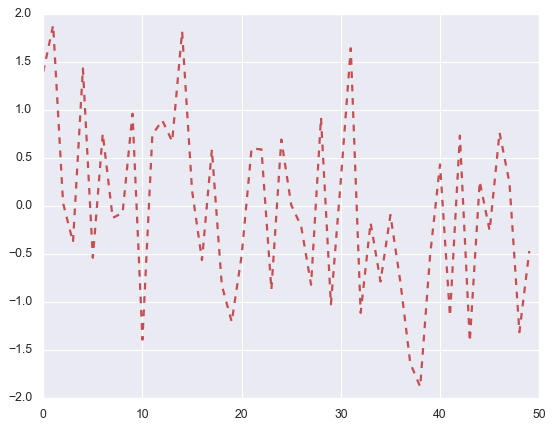

In [66]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

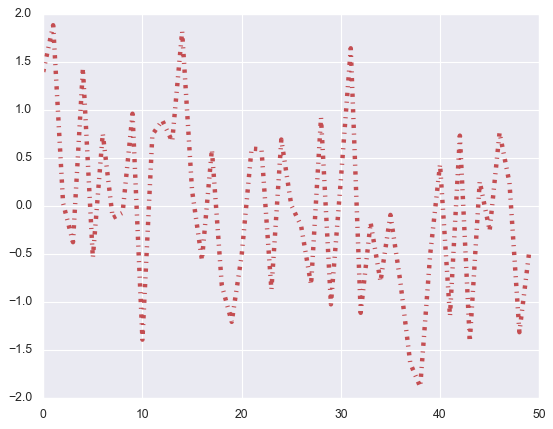

In [67]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

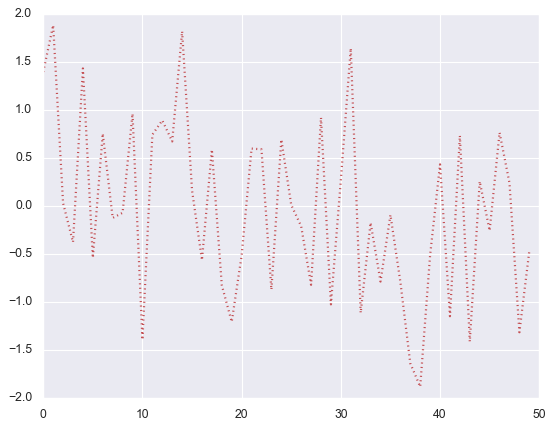

In [68]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

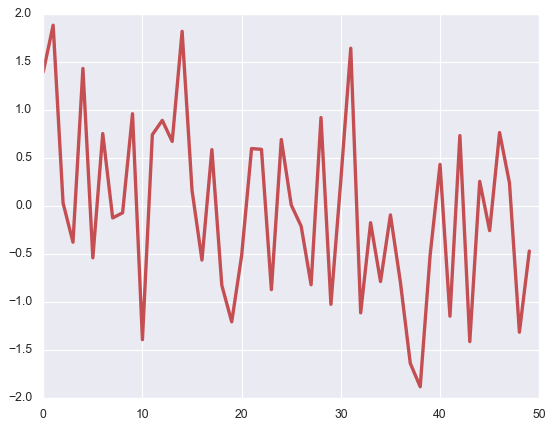

In [69]:
@mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
def plotting_function():
    plt.plot(data)

plotting_function()